# 군집화(Clustering)
- 데이터 포인트들을 비슷한 특성을 가진 그룹으로 나누는 방법
- K-means, DBSCAN, 계층적 클러스터링(Hierarchical Clustering)

## K-Means
- 1)군집의 개수 설정 >> 2)초기 중심점 설정 >> 3)데이터를 가까운 군집에 할당 >> 4)데이터 평균으로 중심점 재 설정
- 3)4)반복 >> 중심점 위치가 변화지 않으면 종료

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns     

import matplotlib.pyplot as plt   
import matplotlib as mpl          
mpl.rc('font', family='Malgun Gothic')    
plt.rcParams['axes.unicode_minus']=False

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
data=np.array([[1, 2], 
               [1, 4], 
               [1, 0],
               [4, 2], 
               [4, 4], 
               [4, 0],
               [10, 2], 
               [10, 4], 
               [10, 0]])

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# 학습
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [18]:
labels=kmeans.labels_               # 각 데이터 포인트의 군집 레이블
print(labels, "\n")

centers=kmeans.cluster_centers_     # 각 군집의 중심 좌표
print(centers, "\n")

print(data[kmeans.labels_ == 1])    # 데이터 값이 알고 싶으면

[2 2 2 0 0 0 1 1 1] 

[[ 4.  2.]
 [10.  2.]
 [ 1.  2.]] 

[[10  2]
 [10  4]
 [10  0]]


In [20]:
# 예측
new_data=np.array([[1, 2]])         # 새로운 데이터
labels=kmeans.predict(new_data)     # 군집 예측
labels                              # 예측된 군집 번호

array([2])

### 과일 분류
* 사과, 바나나, 파인애플 구성

In [23]:
fruits=np.load('./Data/unspervised/fruits_300.npy')
fruits.shape      # 개수, 너비, 높이

(300, 100, 100)

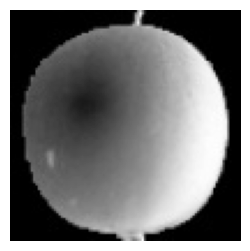

In [25]:
plt.figure(figsize=(3, 3))
plt.imshow(fruits[0], cmap='gray')  # gray_r
plt.axis('off')
plt.show()

In [27]:
# 첫 번째 이미지의 첫 번째 행(100픽셀) 값
fruits[0, 0, :]   # 0 ~ 255

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

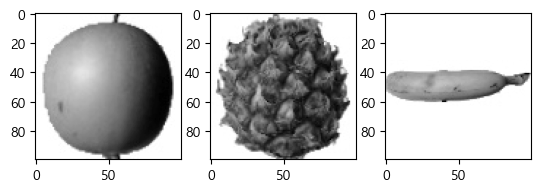

In [29]:
fig, axs=plt.subplots(nrows=1, ncols=3)
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

In [31]:
fruits_2d=fruits.reshape(-1, 100*100)   
fruits_2d.shape

(300, 10000)

In [33]:
kmeans=KMeans(n_clusters=3, random_state=42)    # 기본 n_iter=10번 수행 후 제일 좋은 상황을 골라줌
kmeans.fit(fruits_2d)                           # 타켓없음, 과소/과대없음, 정확도없음

KMeans(n_clusters=3, random_state=42)

In [35]:
print(np.unique(kmeans.labels_, return_counts=True))     # 라벨과 개수 반환

(array([0, 1, 2]), array([112,  98,  90], dtype=int64))


In [37]:
def draw_fruits(arr, col_num=10):
    row_num=int(np.ceil(len(arr) / col_num))  # 필요한 행 개수 계산
    # print(row_num)
    
    fig, axes=plt.subplots(nrows=row_num, ncols=col_num, figsize=(col_num, row_num))  # 12행 10열

    # i:idx, ax:arr
    for i, ax in enumerate(axes.flat):          # 플랫 NumPy 배열처럼 axes를 1차원으로 펼치는 속성
        if i < len(arr):                        # 이미지가 존재하는 경우
            ax.imshow(arr[i], cmap='gray')
            ax.axis("off") 
        else:                                   # 남은 빈 서브플롯 처리
            ax.axis("off")  # 빈 공간은 비우기

    plt.show()

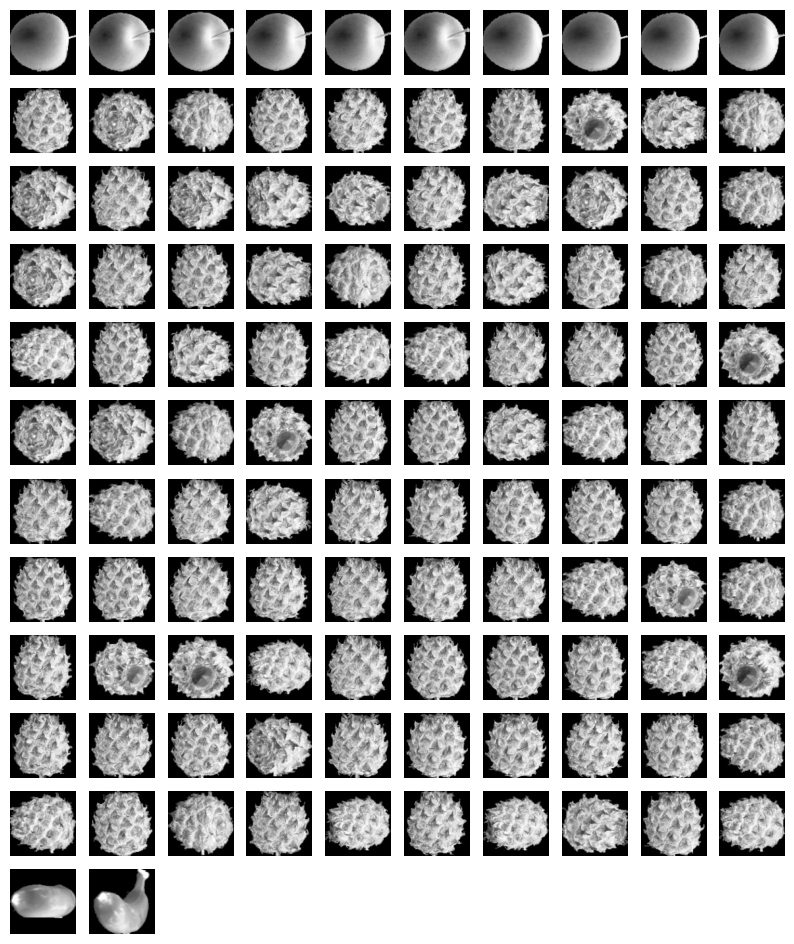

In [39]:
draw_fruits(fruits[kmeans.labels_==0])

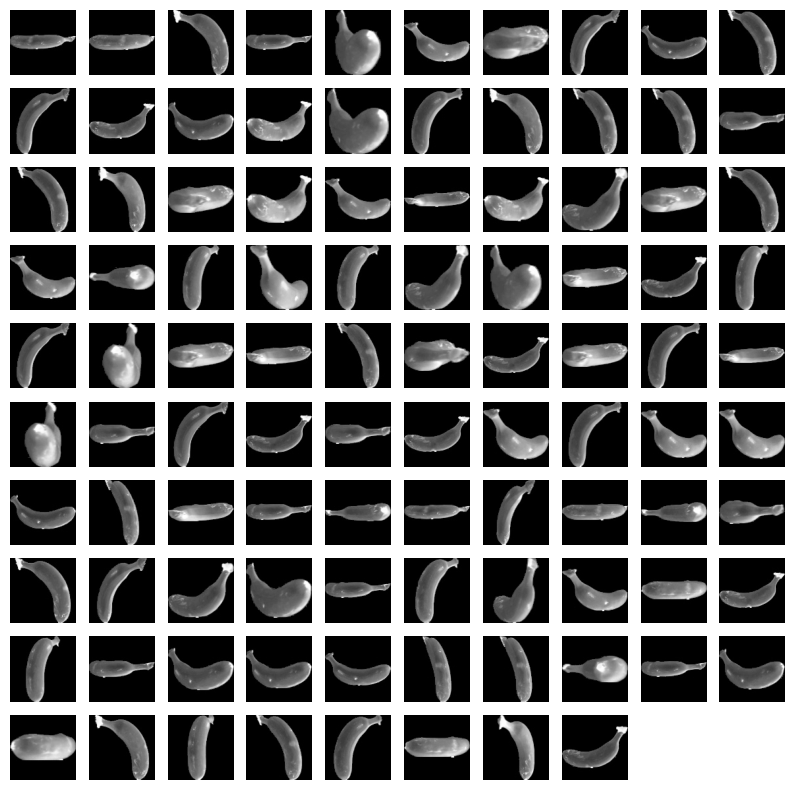

In [40]:
draw_fruits(fruits[kmeans.labels_==1])

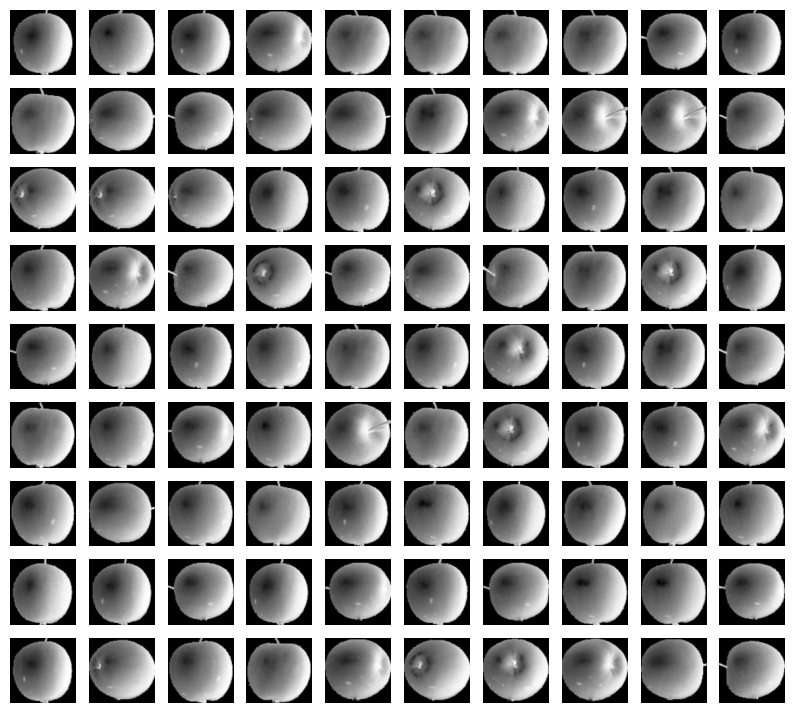

In [41]:
draw_fruits(fruits[kmeans.labels_==2])

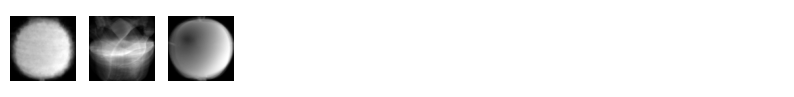

In [43]:
# 중심 값
draw_fruits(kmeans.cluster_centers_.reshape(-1, 100, 100))

In [44]:
kmeans.n_iter_       # 클러스터 중심이 더 이상 크게 변하지 않을 때까지 실행된 횟수

4

### 최적의 K찾기 
* 엘보우

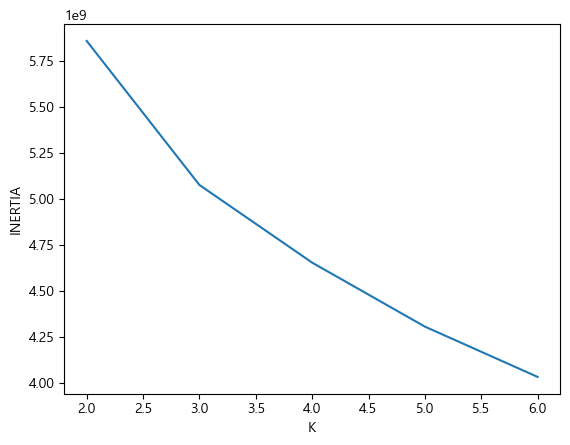

In [47]:
inertia=[]    
for k in range(2, 7):
    km=KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)   # 거리의 제곱합(오차)

plt.plot(range(2, 7), inertia)
plt.xlabel("K")
plt.ylabel("INERTIA")
plt.show()

### 평가 지표

In [49]:
# 군집 평가지표
silhouette_scores=[]

for k in range(2, 7):
    kmen=KMeans(n_clusters=k, random_state=42)
    kmen.fit(fruits_2d)
    
    labels=kmen.predict(fruits_2d)
    score=silhouette_score(fruits_2d, labels)
    silhouette_scores.append(score)
    print(f"K={k}, 실루엣 계수: {score:.3f}")

K=2, 실루엣 계수: 0.393
K=3, 실루엣 계수: 0.242
K=4, 실루엣 계수: 0.210
K=5, 실루엣 계수: 0.223
K=6, 실루엣 계수: 0.206


### 예측

In [211]:
kmeans.transform(fruits_2d[[100]])    # 입력 데이터 X와 각 클러스터 중심 간의 거리 행렬을 반환

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [213]:
kmeans.predict(fruits_2d[[100]])      # labels

array([0])

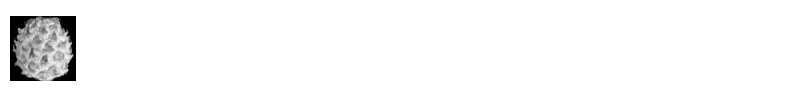

In [215]:
draw_fruits(fruits_2d[[100]].reshape(-1, 100, 100))

## 계층적 군집화
- Hierarchical Clustering 
- 세분화 분리할때, 뉴스기사, 연구논문, 식물, 동물
- 계층적 구조의 시각화

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl   
from matplotlib import pyplot as plt
mpl.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus']=False    

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering   

### 정규화 및 원핫인코딩

In [128]:
data=pd.read_csv('./Data/unspervised/person.csv')
data.shape

(250, 10)

In [130]:
data.columns

Index(['name', 'jumin7', 'gender', 'height', 'age', 'blood_type', 'company',
       'grades', 'salary', 'expenditure'],
      dtype='object')

In [132]:
person=data[['gender','age', 'company', 'grades', 'salary', 'expenditure']]
person.head()

,gender,age,company,grades,salary,expenditure
0,F,22,A,A,4100,1975
1,F,31,A,B,4720,2970
2,F,55,A,B,7280,5905
3,F,28,B,B,4060,2935
4,M,29,B,F,4390,4015


In [134]:
# 정규화
person_scaler=person[['age','salary', 'expenditure']]

scaler=StandardScaler()  
scaler=scaler.fit(person_scaler)  
person_number=pd.DataFrame(scaler.transform(person_scaler), 
                          columns=['age_st', 'salary_st', 'expenditure_st'])
person_number.head()                            

,age_st,salary_st,expenditure_st
0,-1.996162,-1.222845,-1.613278
1,-0.954082,-0.887000,-1.077579
2,1.824798,0.499716,0.502599
3,-1.301442,-1.244513,-1.096422
4,-1.185655,-1.065756,-0.514960


In [136]:
# 원 핫 인코딩
person_dummy=pd.get_dummies(person[['gender', 'company', 'grades']])
person_dummy.head()

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,True,False,True,False,False,True,False,False,False,False
1,True,False,True,False,False,False,True,False,False,False
2,True,False,True,False,False,False,True,False,False,False
3,True,False,False,True,False,False,True,False,False,False
4,False,True,False,True,False,False,False,False,False,True


In [138]:
person_table=pd.concat([person_number, person_dummy], axis=1)
person_table.head()

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,True,False,True,False,False,True,False,False,False,False
1,-0.954082,-0.887000,-1.077579,True,False,True,False,False,False,True,False,False,False
2,1.824798,0.499716,0.502599,True,False,True,False,False,False,True,False,False,False
3,-1.301442,-1.244513,-1.096422,True,False,False,True,False,False,True,False,False,False
4,-1.185655,-1.065756,-0.514960,False,True,False,True,False,False,False,False,False,True


### 모델 및 학습

In [141]:
# 클러스터 수, 유클리디안 거리, 와드 병합법
clu=AgglomerativeClustering(n_clusters=3, linkage='ward')  
clu.fit(person_table)

AgglomerativeClustering(n_clusters=3)

In [143]:
# 클러스터 라벨 확인
clu.labels_

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 시각화
#### 덴드로그램

In [ ]:
fig, ax=plt.subplots(figsize=(20, 10))
linked=linkage(person_table.sample(60, random_state=42), 'ward')   #  데이터를 연결(linkage) 

dendrogram(linked, leaf_rotation=45)

ax.tick_params(axis='x', labelsize=20)     # 축사이즈 변경
plt.show()

#### Scatter Plot

In [149]:
# 클러스터 변수 추가
person_table['cluster_hier']=clu.labels_
person_table['cluster_hier']=person_table['cluster_hier'].map({0:'A', 1:'B', 2:'C'})
person_table.head()

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,-1.996162,-1.222845,-1.613278,True,False,True,False,False,True,False,False,False,False,C
1,-0.954082,-0.887000,-1.077579,True,False,True,False,False,False,True,False,False,False,B
2,1.824798,0.499716,0.502599,True,False,True,False,False,False,True,False,False,False,A
3,-1.301442,-1.244513,-1.096422,True,False,False,True,False,False,True,False,False,False,C
4,-1.185655,-1.065756,-0.514960,False,True,False,True,False,False,False,False,False,True,C


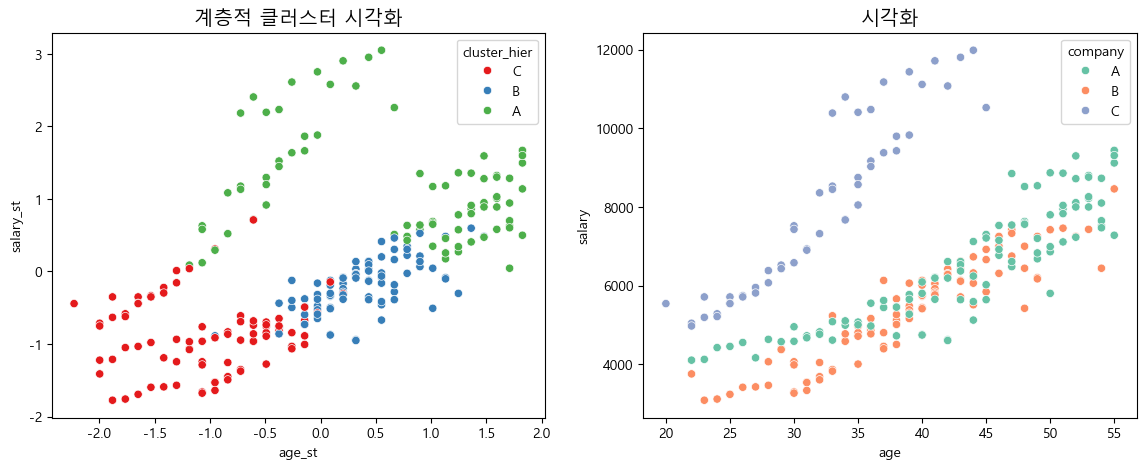

In [151]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.scatterplot(data=person_table, x='age_st', y='salary_st', 
                hue='cluster_hier', 
                palette='Set1',   # 카테고리형 색상 팔레트 (색상이 강하게 구분)
                ax=ax[0])
ax[0].set_title("계층적 클러스터 시각화", fontsize=14)

sns.scatterplot(data=person, x='age', y='salary', 
                hue='company', 
                palette='Set2',   # 부드러운 파스텔톤 색상
                ax=ax[1])
ax[1].set_title("시각화", fontsize=14)
plt.show()

## DBSCAN
* 데이터의 밀도를 기반으로 서로 가까운 데이터를 군집으로 묶는 방법
* 노이즈와 이상치 탐지

In [157]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as mpl   
from matplotlib import pyplot as plt
mpl.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus']=False    

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [167]:
# 샘플 데이터 생성 (반달 모양 데이터)
X, Y=make_moons(n_samples=300, noise=0.05, random_state=42)   # 300개의 샘플을 생성, 잡음 0.05
print(X.shape, Y.shape)

(300, 2) (300,)


In [183]:
moons_df=pd.DataFrame(X, columns=['X1', 'X2'])
moons_df['Y']=Y
moons_df.head()

,X1,X2,Y
0,0.622519,-0.372101,1
1,1.904269,-0.136303,1
2,-0.069431,0.456117,1
3,0.933899,0.237483,0
4,1.180360,-0.490847,1


<Axes: xlabel='X1', ylabel='X2'>

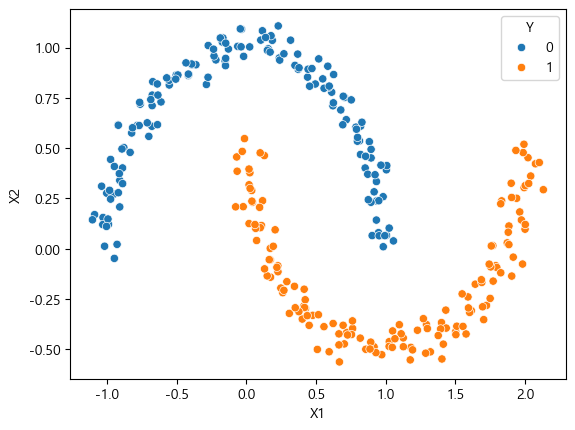

In [185]:
sns.scatterplot(data=moons_df, x='X1', y='X2', hue='Y')

### 모델 및 학습

In [187]:
df=pd.DataFrame(X, columns=['X1', 'X2'])

In [189]:
dbscan=DBSCAN(eps=0.3, min_samples=5)    # epsilon 0.3, min points
dbscan.fit(df.values)

DBSCAN(eps=0.3)

In [191]:
moons_df['cluster']=dbscan.labels_

<Axes: xlabel='X1', ylabel='X2'>

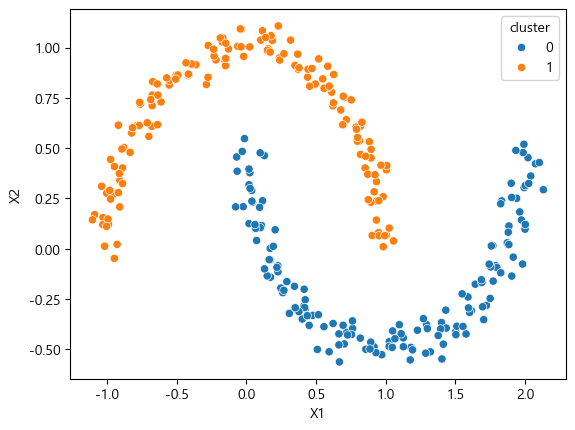

In [195]:
sns.scatterplot(data=moons_df, x='X1', y='X2', hue='cluster')

- 결론]
- K평균 군집화 : 비슷한 패턴이나 행동을 가진 그룹
- 계층적 군집화 : 세분화 분리할때, 뉴스기사, 연구논문, 식물, 동물
- 밀도기반 : 이상치 탐지

# 연관분석(Association Analysis)
- 지지도, 신뢰도, 향상도
- !pip install mlxtend

In [37]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
store=[["맥주", "오징어", "치즈"], 
      ["소주", "맥주", "라면"], 
      ["맥주", "오징어"], 
      ["라면", "김치", "계란"], 
      ["맥주", "소세지"]]
store

[['맥주', '오징어', '치즈'],
 ['소주', '맥주', '라면'],
 ['맥주', '오징어'],
 ['라면', '김치', '계란'],
 ['맥주', '소세지']]

In [30]:
# 리스트 형태의 거래 데이터를 원-핫 인코딩 형태로 변환
encoder=TransactionEncoder()
encoder.fit(store)

encoder_onthot=encoder.transform(store)
encoder_onthot

array([[False, False, False,  True, False, False,  True,  True],
       [False, False,  True,  True, False,  True, False, False],
       [False, False, False,  True, False, False,  True, False],
       [ True,  True,  True, False, False, False, False, False],
       [False, False, False,  True,  True, False, False, False]])

In [41]:
store_table=pd.DataFrame(encoder_onthot, columns=encoder.columns_)
store_table

,계란,김치,라면,맥주,소세지,소주,오징어,치즈
0,False,False,False,True,False,False,True,True
1,False,False,True,True,False,True,False,False
2,False,False,False,True,False,False,True,False
3,True,True,True,False,False,False,False,False
4,False,False,False,True,True,False,False,False


## Aprioir 알고리즘 
- 지지도(동시에 구매할 확률)를 활용하여 연관집합이 자주 발생하는 발견하는 알고리즘

In [44]:
#  0/1 원핫인코딩 테이블 / 컬럼명(상품명 등)으로 변환 / 최소 지지도 0.1 = 10%
apri=apriori(store_table, use_colnames=True, min_support=0.1)    
apri

,support,itemsets
0,0.2,(계란)
1,0.2,(김치)
2,0.4,(라면)
3,0.8,(맥주)
4,0.2,(소세지)
5,0.2,(소주)
6,0.4,(오징어)
7,0.2,(치즈)
8,0.2,"(계란, 김치)"
9,0.2,"(계란, 라면)"


In [99]:
# 평가 지표 기준
result=association_rules(apri, metric='lift')      # 신뢰도(confidence), 향상도(life) / min_threshold=0.5 (50% 이상)
result.head()                                   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(계란),(김치),0.2,0.2,0.2,1.0,5.0,1.0,0.16,inf,1.00,1.0,1.000,1.00
1,(김치),(계란),0.2,0.2,0.2,1.0,5.0,1.0,0.16,inf,1.00,1.0,1.000,1.00
2,(계란),(라면),0.2,0.4,0.2,1.0,2.5,1.0,0.12,inf,0.75,0.5,1.000,0.75
3,(라면),(계란),0.4,0.2,0.2,0.5,2.5,1.0,0.12,1.6,1.00,0.5,0.375,0.75
4,(김치),(라면),0.2,0.4,0.2,1.0,2.5,1.0,0.12,inf,0.75,0.5,1.000,0.75


In [101]:
result.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

## 결과
- antecedents → 선행 항목 (A, 원인)
- consequents → 후행 항목 (B, 결과) 
- support(지지도)
    - A와 B가 함께 등장한 비율
    - 추천 연관 강도를 얼마나 지지 할 수 있는지에 대한 척도
    - (ex. 맥주와 치킨을 동시 구매 확률)
- confidence(신뢰도)
    - A가 등장했을 때 B도 등장할 확률
    - 두 상품의 연관 강도
    - (ex. 맥주구매 했을때 치킨을 구매할 확률)
- lift(향상도)
    - 두 상품의 우연히 강해지는 경우를 제외한 확률
    - life > 1 : 우연히 아님(강한 연관성)
    - life = 1 : 두 상품의 구매가 독립적
    - life < 1 : 우연에 의한 구매 확률이 높음

In [104]:
result[['antecedents', 'consequents',  'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(계란),(김치),0.2,1.00,5.00
1,(김치),(계란),0.2,1.00,5.00
2,(계란),(라면),0.2,1.00,2.50
3,(라면),(계란),0.2,0.50,2.50
4,(김치),(라면),0.2,1.00,2.50
5,(라면),(김치),0.2,0.50,2.50
6,(소주),(라면),0.2,1.00,2.50
7,(라면),(소주),0.2,0.50,2.50
8,(소세지),(맥주),0.2,1.00,1.25
9,(맥주),(소세지),0.2,0.25,1.25


# PCA - 차원 축소
- 데이터 : iris 데이터 셋
- 전처리 : StandardScaler, PCA
- 모델 학습 : RandomForestClassifier

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib as mpl   
mpl.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus']=False   

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate

## 데이터 로드 및 전처리

In [244]:
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species']=iris.target_names[iris.target]   

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

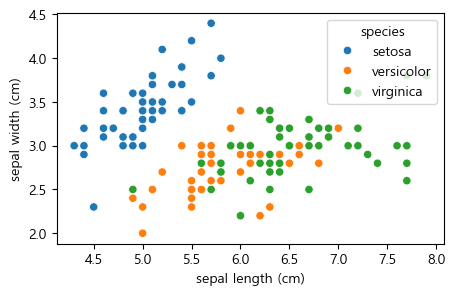

In [278]:
# 시각화
plt.figure(figsize=(5, 3))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')

In [248]:
# 스케일 - 표준화
iris_scaled=StandardScaler().fit_transform(iris.data)

## PCA 적용

In [251]:
# PCA 모델 생성 - 주성분 2개
pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

In [253]:
print('원본 데이터 형태:', iris_scaled.shape)
print('PCA 적용된 데이터 형태:', iris_pca.shape)

원본 데이터 형태: (150, 4)
PCA 적용된 데이터 형태: (150, 2)


## PCA 성분

In [256]:
pca.components_.shape   

# 추출된 주성분의 개수 (PCA(n_components=k)에서 설정한 값)
# 원본 데이터의 특성(feature) 개수

(2, 4)

In [258]:
pca.components_

# 첫 번째 행: 첫 번째 주성분(PC1)의 방향
# 두 번째 행: 두 번째 주성분(PC2)의 방향 

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [260]:
pca.explained_variance_ratio_

# 전체 데이터 분산(variance)에서 차지하는 비율을 나타냅니다.
# 첫 번째 주성분(PC1) → 가장 많은 분산(정보량)을 설명
# 두 번째 주성분(PC2) → 남은 분산 중 가장 많은 부분을 설명

array([0.72962445, 0.22850762])

In [262]:
# PCA 적용된 DataFrame  생성
pca_columns=['pca_component_1','pca_component_2']
pca_df=pd.DataFrame(data=iris_pca, columns=pca_columns)

pca_df['species']=iris.target
pca_df.head()

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


<Axes: xlabel='pca_component_1', ylabel='pca_component_2'>

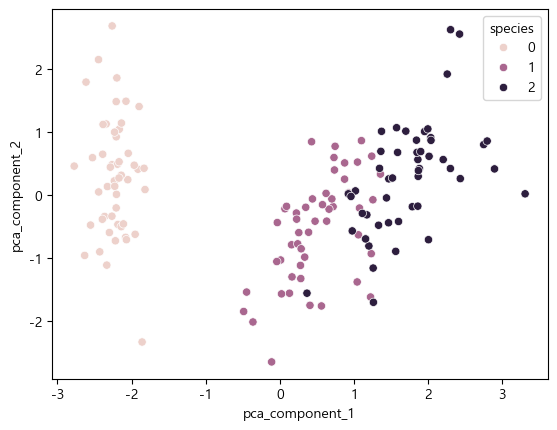

In [264]:
sns.scatterplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='species')

## 학습 및 평가

In [267]:
# 원본 예측 
forest=RandomForestClassifier(n_jobs=-1, random_state=123)

# 평가 점수(스코어)만 반환(5번) / cross_validate : 더 많은 정보 
scores=cross_val_score(forest, iris_scaled, iris.target, scoring='accuracy', cv=5)
print(scores)

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


In [268]:
# PCA 적용된 데이터 사용
pca_x=pca_df[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(forest, pca_x, iris.target, scoring='accuracy', cv=5)
print(scores_pca)

[0.83333333 0.93333333 0.83333333 0.9        1.        ]


## Elbow
- 엘보우 Check

In [271]:
pca_ex=PCA()
pca_ex.fit(iris_scaled)
iris_pca_ex=pca_ex.transform(iris_scaled)

explained_variance_ratio_ex=pca_ex.explained_variance_ratio_
cumsum_variance_ex=np.cumsum(explained_variance_ratio_ex)   # 누적 합 계산

explained_variance_ratio_ex, cumsum_variance_ex

(array([0.72962445, 0.22850762, 0.03668922, 0.00517871]),
 array([0.72962445, 0.95813207, 0.99482129, 1.        ]))

<Axes: >

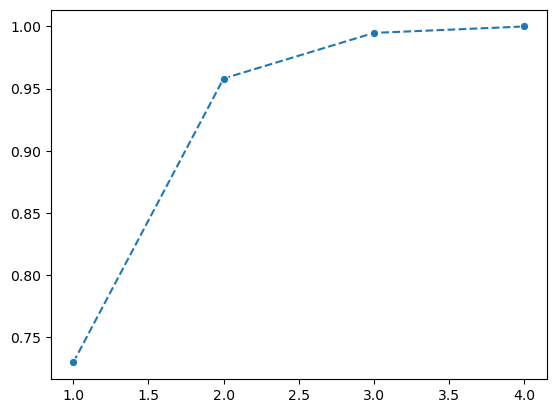

In [232]:
sns.lineplot(x=range(1, len(cumsum_variance_ex) + 1), 
             y=cumulative_variance, 
             marker='o', linestyle='--')

---

In [136]:
# End of file